## What does the purchase of a bicycle depend on?

The aim of the work is to identify factors influencing the decision to purchase a bicycle. It is based on the analysis of a database of 1,000 people from Europe, the Pacific, and North America, which contains information about them such as: marital status, gender, income, number of children, education, occupation, home ownership, number of cars, distance from home to work, and age.

Data source:
https://www.kaggle.com/datasets/heeraldedhia/bike-buyers

#### Import of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

#### Loading data and initial general information about the database

In [2]:
!git clone https://github.com/SylwiaRe/MAD

bikes = pd.read_csv(f'MAD/bike_buyers.csv')
bikes.head(10)

fatal: destination path 'MAD' already exists and is not an empty directory.


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [4]:
bikes.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

#### Setting indexes

In the correlation analysis, the column with the person's ID number is unnecessary, so we will remove this column.

In [5]:
bikes.drop('ID', axis=1, inplace=True)

In [6]:
bikes.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    993 non-null    object 
 1   Gender            989 non-null    object 
 2   Income            994 non-null    float64
 3   Children          992 non-null    float64
 4   Education         1000 non-null   object 
 5   Occupation        1000 non-null   object 
 6   Home Owner        996 non-null    object 
 7   Cars              991 non-null    float64
 8   Commute Distance  1000 non-null   object 
 9   Region            1000 non-null   object 
 10  Age               992 non-null    float64
 11  Purchased Bike    1000 non-null   object 
dtypes: float64(4), object(8)
memory usage: 93.9+ KB


Replacing missing values in the Income column with the average for the given region, occupation, and gender:

In [8]:
for region in ['North America','Europe','Pacific']:
    for gender in ['Male', 'Female']:
        for occupation in ['Professional', 'Skilled Manual', 'Clerical', 'Management', 'Manual']:
            
            bikes.loc[(bikes.Region == region) & (bikes.Gender == gender) & (bikes.Occupation == occupation), 'Mean Income'] = bikes[(bikes.Region == region) & (bikes.Gender == gender) & (bikes.Occupation == occupation)].Income.mean()
            
            bikes['Income'] = bikes['Income'].fillna(bikes['Mean Income'])
            bikes.drop(columns=['Mean Income'], inplace=True)

In [9]:
bikes.head(10)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000.000000,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,Male,30000.000000,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,Male,80000.000000,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,NaN,70000.000000,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,Male,30000.000000,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,Married,Female,10000.000000,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,Single,Male,160000.000000,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,Married,Male,40000.000000,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,NaN,Male,20000.000000,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,Married,Male,15609.756098,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


Changing data types to the most appropriate ones based on the content using the convert_dtypes() function.

In [10]:
bikes = bikes.convert_dtypes()
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    993 non-null    string 
 1   Gender            989 non-null    string 
 2   Income            1000 non-null   float64
 3   Children          992 non-null    Int64  
 4   Education         1000 non-null   string 
 5   Occupation        1000 non-null   string 
 6   Home Owner        996 non-null    string 
 7   Cars              991 non-null    Int64  
 8   Commute Distance  1000 non-null   string 
 9   Region            1000 non-null   string 
 10  Age               992 non-null    Int64  
 11  Purchased Bike    1000 non-null   string 
dtypes: Int64(3), float64(1), string(8)
memory usage: 96.8 KB


#### Checking dependencies

To begin with, we will analyze each feature separately to avoid losing too many records by using the dropna() function on the entire database. We will remove missing values in the analyzed sections of the database.

##### REGION OF RESIDENCE AND BICYCLE PURCHASE

###### CREATING A COLOR PALETTE:

In [11]:
sns.set_style('white')
yn_palette = ['#a8d3e6', '#e4e6eb']
yn_colormap = ListedColormap(sns.color_palette(yn_palette))

###### DATA PREPARATION:

In [12]:
bikes_region=pd.DataFrame(bikes[['Region', 'Purchased Bike']])
bikes_region.dropna(inplace=True)
bikes_region.groupby('Region').count()

,Purchased Bike
Region,
Europe,300
North America,508
Pacific,192


###### GENERATING A CHART:

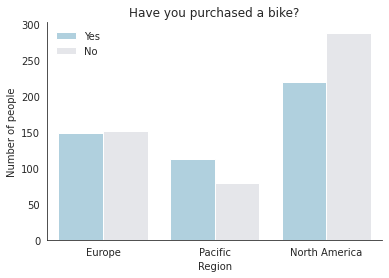

In [13]:
fig, ax = plt.subplots()

hueorder = ['Yes', 'No']

sns.countplot(x='Region', data = bikes_region, hue='Purchased Bike', hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

Significant differences between regions and unbalanced group sizes, which is why we will analyze each dependency both overall in the group and divided by region.

The highest likelihood of purchasing a bicycle is for residents of the Pacific region, the lowest for America; in Europe, about half of those surveyed purchased a bicycle.

##### 1. Marital Status

###### DATA PREPARATION:

In [14]:
bikes_marital=pd.DataFrame(bikes[['Marital Status', 'Purchased Bike', 'Region']])
bikes_marital.dropna(inplace=True)
bikes_marital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Marital Status  993 non-null    string
 1   Purchased Bike  993 non-null    string
 2   Region          993 non-null    string
dtypes: string(3)
memory usage: 31.0 KB


###### GENERATING A CHART:

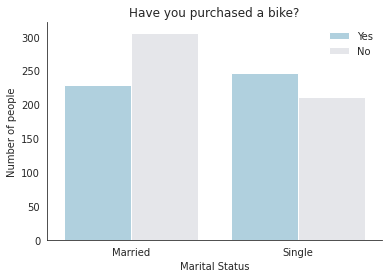

In [15]:
fig, ax = plt.subplots()

order = ['Married', 'Single']
hueorder = ['Yes', 'No']

sns.countplot(x='Marital Status', data = bikes_marital, hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=1, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

Among singles, bicycle owners were the majority, while among married individuals, more than half did not own a bicycle.

Let's check if the same trend persists across different geographic regions:

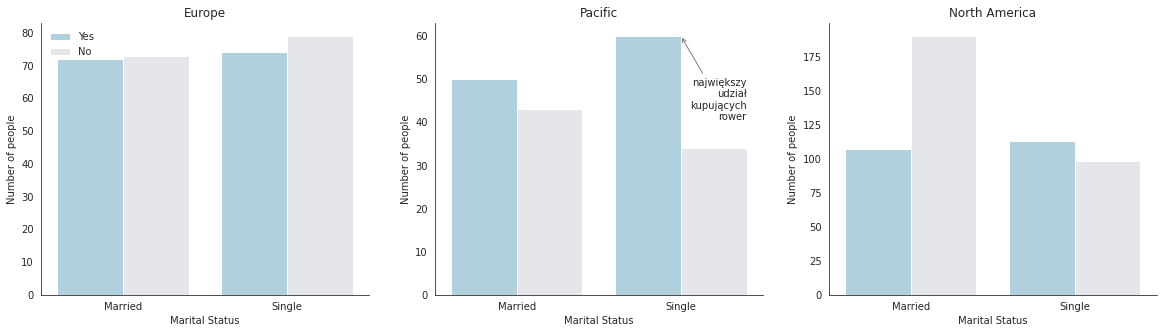

In [16]:
fig, ax=plt.subplots(1,3, figsize=(20,5))
order = ['Married', 'Single']
hueorder = ['Yes', 'No']
labels = ['No', 'Yes']

e = sns.countplot(x='Marital Status', data = bikes_marital[bikes_marital.Region == 'Europe'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Marital Status', data = bikes_marital[bikes_marital.Region == 'Pacific'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Marital Status', data = bikes_marital[bikes_marital.Region == 'North America'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[1].annotate('największy\nudział\nkupujących\nrower', xy=(1, 60),
               xytext=(0.95, 0.8), textcoords='axes fraction',
               arrowprops={"arrowstyle":"->", "color":"gray"},
               horizontalalignment='right', verticalalignment='top'
              )

e.legend(loc=2, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

Breaking it down by region shows variation: in Europe, regardless of marital status, more than half of the people do not own a bicycle. In the Pacific region, in both groups, more than half of the people owned a bicycle, with singles showing a greater interest in purchasing one. In America, however, there is a significant majority of people without a bicycle among married individuals.

##### 2. Gender

###### DATA PREPARATION:

In [17]:
bikes_gender=pd.DataFrame(bikes[['Gender', 'Purchased Bike', 'Region']])
bikes_gender.dropna(inplace=True)
bikes_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          989 non-null    string
 1   Purchased Bike  989 non-null    string
 2   Region          989 non-null    string
dtypes: string(3)
memory usage: 30.9 KB


###### GENERATING A CHART:

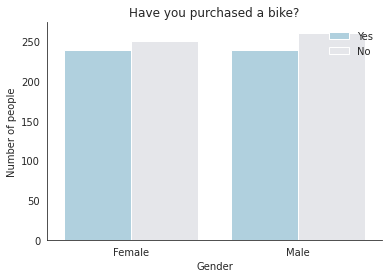

In [18]:
fig, ax = plt.subplots()

hueorder = ['Yes', 'No']

sns.countplot(x='Gender', data = bikes_gender, hue='Purchased Bike', hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

Breaking it down by gender, there are no significant differences in bicycle ownership between women and men. Let's compare this data across regions:

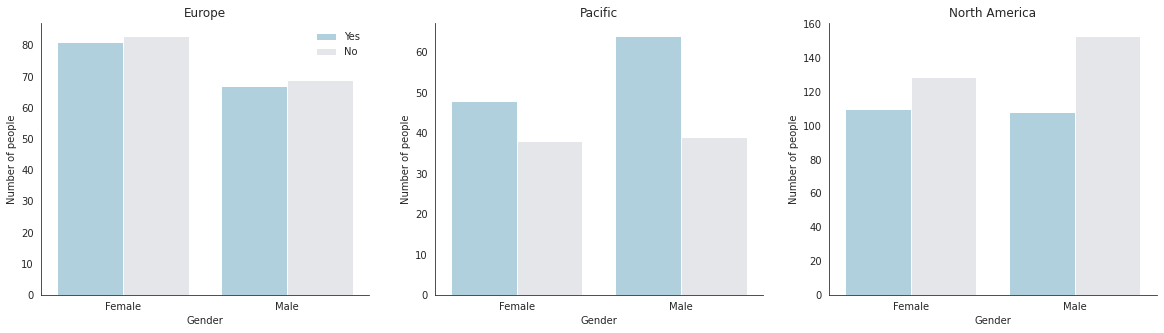

In [19]:
fig,ax=plt.subplots(1,3, figsize=(20,5))

order = ['Female', 'Male']
hueorder = ['Yes', 'No']

e = sns.countplot(x='Gender', data = bikes_gender[bikes_gender.Region == 'Europe'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Gender', data = bikes_gender[bikes_gender.Region == 'Pacific'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Gender', data = bikes_gender[bikes_gender.Region == 'North America'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

In Europe, there is a balance between genders, while in the Pacific region, more than half of the people own a bicycle, with men showing greater interest in purchasing one. In America, less than half of the respondents owned a bicycle, but women were statistically more active.

##### 3. Income

###### DATA PREPARATION:

In [20]:
bikes_income=pd.DataFrame(bikes[['Income', 'Purchased Bike', 'Region']])
bikes_income.dropna(inplace=True)
bikes_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          1000 non-null   float64
 1   Purchased Bike  1000 non-null   string 
 2   Region          1000 non-null   string 
dtypes: float64(1), string(2)
memory usage: 31.2 KB


###### GENERATING A CHART:

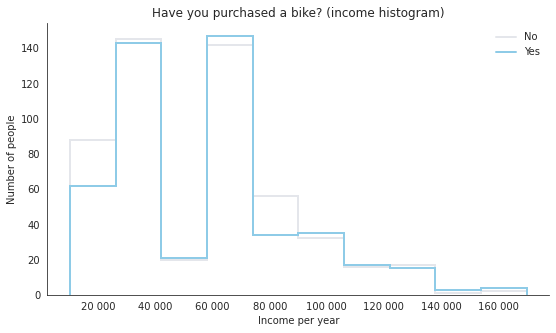

In [21]:
from matplotlib.lines import Line2D
from matplotlib import ticker

# podział zbioru na grupy, w krórych zakupiono i nie zakupiono roweru
bike_yes = bikes_income[bikes_income['Purchased Bike'] == 'Yes']['Income']
bike_no = bikes_income[bikes_income['Purchased Bike'] == 'No']['Income']

fig, ax = plt.subplots(figsize=(9,5))
ax.hist([bike_yes, bike_no], histtype='step', linewidth=2, color=['#8ECBE7', '#e4e6eb'], alpha=1, label=['Yes','No'])

handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1], alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x)).replace(",", " ")))

plt.title('Have you purchased a bike? (income histogram)')
plt.xlabel('Income per year')
plt.ylabel('Number of people')
plt.show()

Overall, there were no significant differences between people who purchased and did not purchase a bicycle. However, interestingly, among the lowest earners and those earning around 80k, the majority were people who did not purchase a bicycle.

##### 4. Number of children

###### DATA PREPARATION:

In [22]:
bikes_children=pd.DataFrame(bikes[['Children', 'Purchased Bike', 'Region']])
bikes_children.dropna(inplace=True)
bikes_children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Children        992 non-null    Int64 
 1   Purchased Bike  992 non-null    string
 2   Region          992 non-null    string
dtypes: Int64(1), string(2)
memory usage: 32.0 KB


###### GENERATING A CHART:

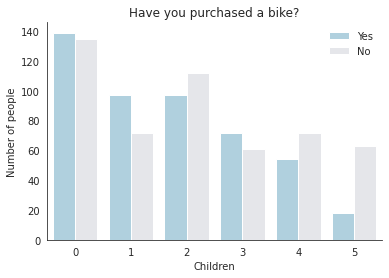

In [23]:
fig, ax = plt.subplots()

hueorder = ['Yes', 'No']

sns.countplot(x='Children', data = bikes_children, hue='Purchased Bike', hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

In the studied group, the highest tendency to purchase a bicycle was among people with one child, and the lowest was among those with 4 or more children.

Charts by region:

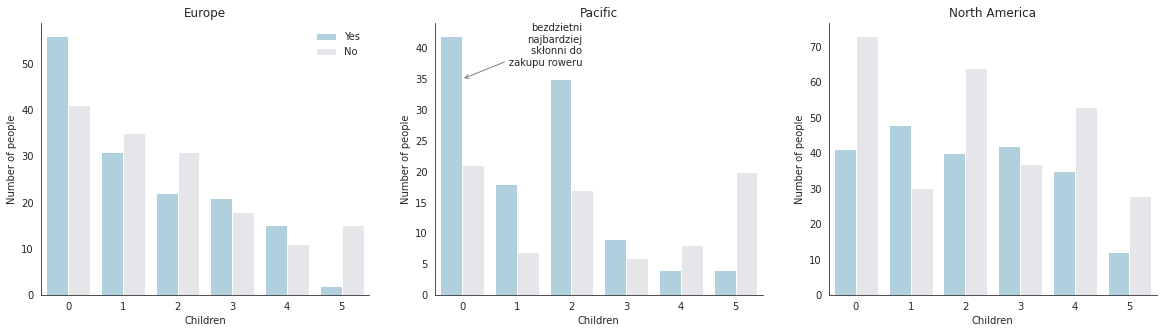

In [24]:
fig,ax=plt.subplots(1,3, figsize=(20,5))

hueorder = ['Yes', 'No']

e = sns.countplot(x='Children', data = bikes_children[bikes_children.Region == 'Europe'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Children', data = bikes_children[bikes_children.Region == 'Pacific'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Children', data = bikes_children[bikes_children.Region == 'North America'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[1].annotate('bezdzietni\nnajbardziej\nskłonni do\nzakupu roweru', xy=(0, 35),
               xytext=(0.45, 1), textcoords='axes fraction',
               arrowprops={"arrowstyle":"->", "color":"gray"},
               horizontalalignment='right', verticalalignment='top'
              )

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

In Europe, the tendency to purchase a bicycle decreases with the number of children. Only among childless individuals was there a significant majority of those who bought a bicycle. In the Pacific region, people with up to 2 children were the most likely to purchase a bicycle; for 3 children, this tendency decreased, and for 4 and 5 children, the majority did not buy a bicycle. In America, those with 2 children were the most likely to purchase a bicycle. Interestingly, the pattern seen in Europe and the Pacific, where childless individuals were the most likely to buy a bicycle, did not repeat.

##### 5. Education

###### DATA PREPARATION:

In [25]:
bikes_education=pd.DataFrame(bikes[['Education', 'Purchased Bike', 'Region']])
bikes_education.dropna(inplace=True)

###### GENERATING A CHART:
For better readability of the chart, we choose a horizontal layout.

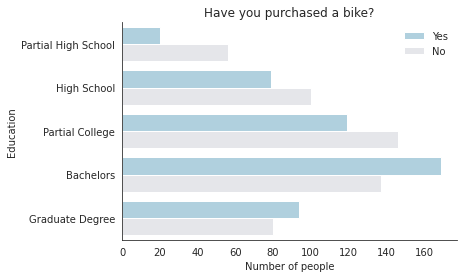

In [26]:
fig, ax = plt.subplots()

order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']
hueorder = ['Yes', 'No']

sns.countplot(y='Education', data = bikes_education, hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.xlabel('Number of people');

An interesting correlation when analyzing the relationship between education and bicycle purchase: the likelihood of purchasing a bicycle increases with higher levels of education.

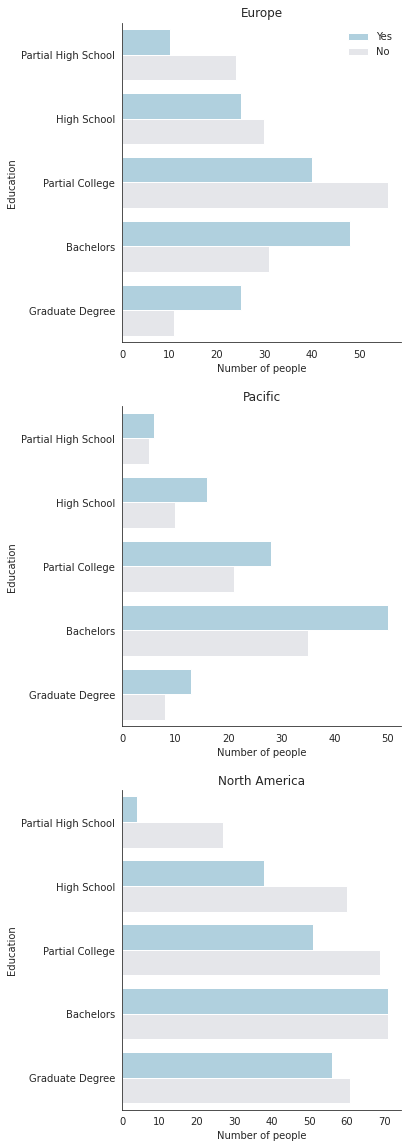

In [27]:
fig,ax=plt.subplots(3,1, figsize=(5,20))

order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']
hueorder = ['Yes', 'No']

e = sns.countplot(y='Education', data = bikes_education[bikes_education.Region == 'Europe'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(y='Education', data = bikes_education[bikes_education.Region == 'Pacific'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(y='Education', data = bikes_education[bikes_education.Region == 'North America'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(xlabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

A similar correlation is seen in Europe: the higher the education level, the greater the tendency to purchase a bicycle. In the Pacific region, there was a majority of people who bought a bicycle regardless of education level, but this majority was smallest for the lowest education levels. In America, no group showed a majority of bicycle buyers when divided by education level.

##### 6. Occupation

###### DATA PREPARATION:

In [28]:
bikes_occupation=pd.DataFrame(bikes[['Occupation', 'Purchased Bike', 'Region']])
bikes_occupation.dropna(inplace=True)

###### GENERATING A CHART:

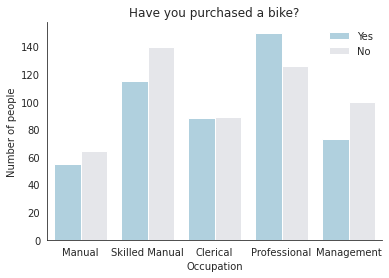

In [29]:
fig, ax = plt.subplots()

order = ['Manual', 'Skilled Manual', 'Clerical', 'Professional', 'Management']
hueorder = ['Yes', 'No']

sns.countplot(x='Occupation', data = bikes_occupation, hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

A majority of bicycle buyers are professionals.
Let's analyze the relationships across regions:

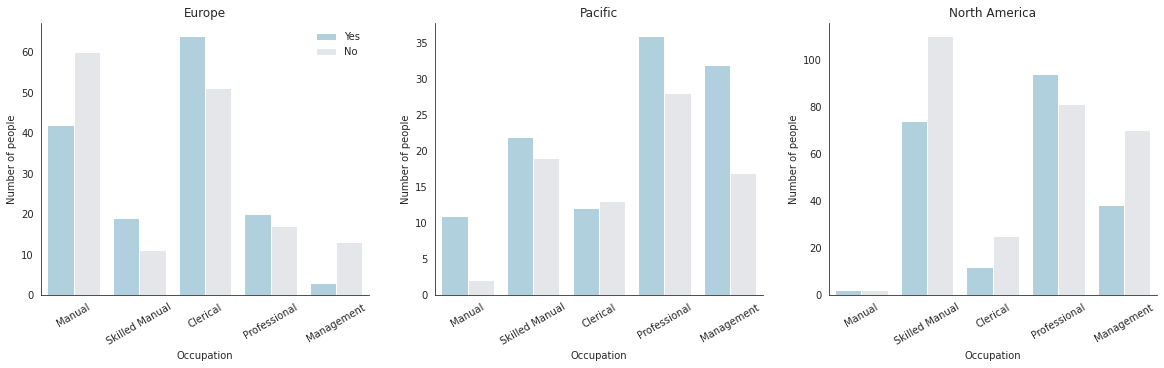

In [30]:
fig,ax=plt.subplots(1,3, figsize=(20,5))

order = ['Manual', 'Skilled Manual', 'Clerical', 'Professional', 'Management']
hueorder = ['Yes', 'No']

e = sns.countplot(x='Occupation', data = bikes_occupation[bikes_occupation.Region == 'Europe'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Occupation', data = bikes_occupation[bikes_occupation.Region == 'Pacific'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Occupation', data = bikes_occupation[bikes_occupation.Region == 'North America'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].tick_params(axis='x', labelrotation=30)
ax[1].tick_params(axis='x', labelrotation=30)
ax[2].tick_params(axis='x', labelrotation=30)

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

In Europe, the largest majority of bicycle buyers were among skilled workers and clerks; in the Pacific region, among professionals and managers; in America, only among professionals (though the majority was not significant).

##### 7. Home ownership

###### DATA PREPARATION:

In [31]:
bikes_home=pd.DataFrame(bikes[['Home Owner', 'Purchased Bike', 'Region']])
bikes_home.dropna(inplace=True)

###### GENERATING A CHART:

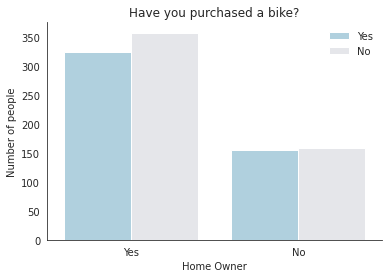

In [32]:
fig, ax = plt.subplots()

hueorder = ['Yes', 'No']

sns.countplot(x='Home Owner', data = bikes_home, hue='Purchased Bike', hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

There is no correlation between home ownership and bicycle purchase.

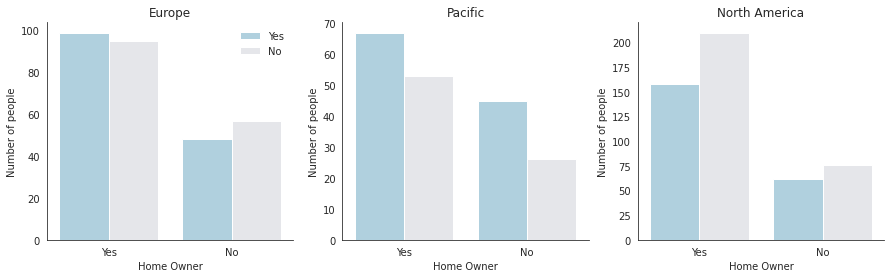

In [33]:
fig,ax=plt.subplots(1,3, figsize=(15,4))

hueorder = ['Yes', 'No']

e = sns.countplot(x='Home Owner', data = bikes_home[bikes_home.Region == 'Europe'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Home Owner', data = bikes_home[bikes_home.Region == 'Pacific'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Home Owner', data = bikes_home[bikes_home.Region == 'North America'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

There is no significant correlation between home ownership and bicycle purchase. Only in America is there a slightly lower tendency for homeowners to purchase a bicycle.

##### 8. Number of cars owned

###### DATA PREPARATION:

In [34]:
bikes_cars=pd.DataFrame(bikes[['Cars', 'Purchased Bike', 'Region']])
bikes_cars.dropna(inplace=True)

###### GENERATING A CHART:

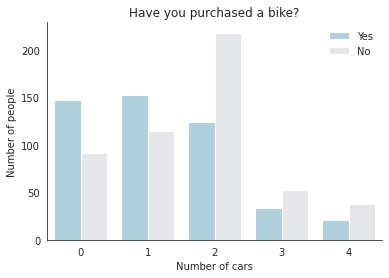

In [35]:
fig, ax = plt.subplots()

hueorder = ['Yes', 'No']

sns.countplot(x='Cars', data = bikes_cars, hue='Purchased Bike', hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.xlabel('Number of cars')
plt.ylabel('Number of people');

The highest likelihood of purchasing a bicycle is for people who do not own a car or own up to one; the trend reverses for those who own 2 or more cars.

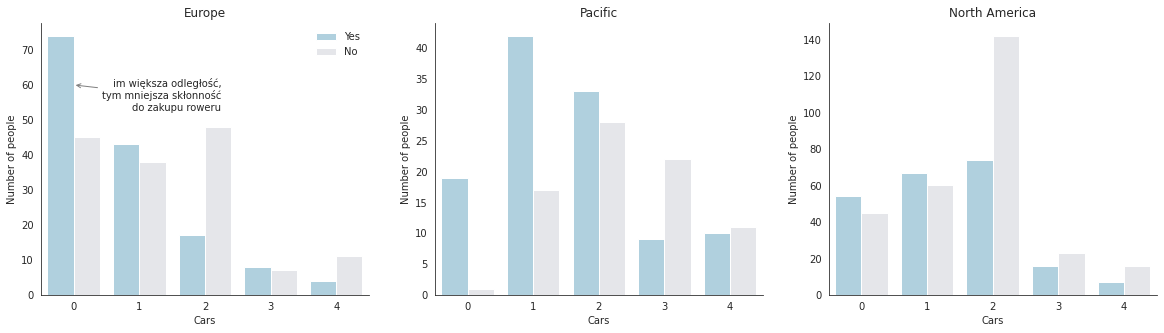

In [36]:
fig,ax=plt.subplots(1,3, figsize=(20,5))

hueorder = ['Yes', 'No']

e = sns.countplot(x='Cars', data = bikes_cars[bikes_cars.Region == 'Europe'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Cars', data = bikes_cars[bikes_cars.Region == 'Pacific'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Cars', data = bikes_cars[bikes_cars.Region == 'North America'], hue='Purchased Bike', hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].annotate('im większa odległość,\ntym mniejsza skłonność\ndo zakupu roweru', xy=(0, 60),
               xytext=(0.55, 0.8), textcoords='axes fraction',
               arrowprops={"arrowstyle":"->", "color":"gray"},
               horizontalalignment='right', verticalalignment='top'
              )

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

Similar trends across regions:
- In Europe, most bicycle owners are among those who do not own a car, with the majority decreasing for those owning 1 car.
- In the Pacific region, the vast majority of people without a car owned a bicycle, with the majority also holding for those with 1-2 cars; the trend reverses for those owning 3 or more cars.
- In America, the trend is similar, though not as pronounced.

##### 9. Distance from home to workplace

###### DATA PREPARATION:

In [37]:
bikes_commute=pd.DataFrame(bikes[['Commute Distance', 'Purchased Bike', 'Region']])
bikes_commute.dropna(inplace=True)

###### GENERATING A CHART:

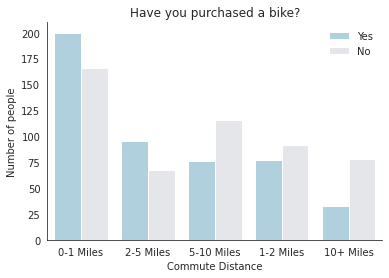

In [38]:
fig, ax = plt.subplots()

order = ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles']
hueorder = ['Yes', 'No']

sns.countplot(x='Commute Distance', data = bikes_commute, hue='Purchased Bike', hue_order = hueorder, palette=yn_palette)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

Overall, the tendency to own a bicycle decreases as the distance from home to the workplace increases. Let's check this by region:

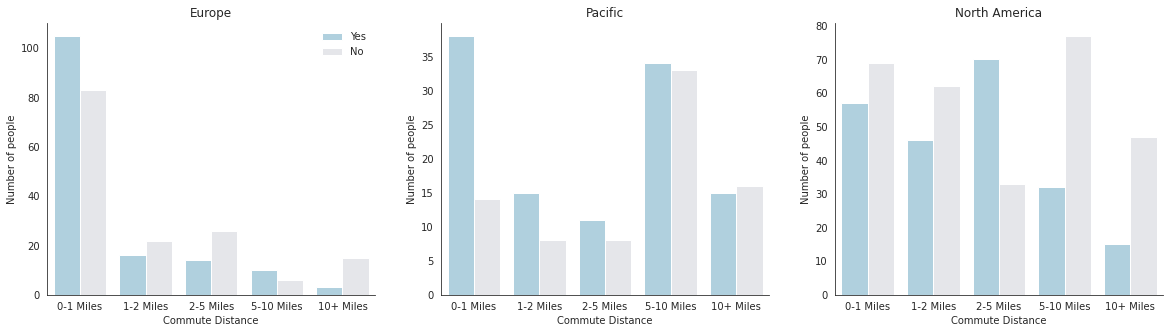

In [39]:
fig,ax=plt.subplots(1,3, figsize=(20,5))

order = ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles']
hueorder = ['Yes', 'No']

e = sns.countplot(x='Commute Distance', data = bikes_commute[bikes_commute.Region == 'Europe'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[0])
p = sns.countplot(x='Commute Distance', data = bikes_commute[bikes_commute.Region == 'Pacific'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[1])
a = sns.countplot(x='Commute Distance', data = bikes_commute[bikes_commute.Region == 'North America'], hue='Purchased Bike', order = order, hue_order = hueorder, palette=yn_palette, ax=ax[2])

ax[0].set_title('Europe')
ax[1].set_title('Pacific')
ax[2].set_title('North America')

for i in range(3):
    ax[i].set(ylabel='Number of people')
    
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

e.legend(loc=0, frameon=False)
p.legend([], [], frameon=False)
a.legend([], [], frameon=False);

Regional dependencies:
- In Europe, the highest likelihood of purchasing a bicycle is for people who work within 1 mile (1.6 km) from home.
- In the Pacific region, there is a significant majority of bicycle buyers among those who work within 2 miles (3.2 km) from home.
- In America, the highest likelihood of purchasing a bicycle is for people who work 2-5 miles (3.2 - 8 km) from home, rather than those working the closest, as seen in other regions.

##### 10. Age

###### DATA PREPARATION:

In [40]:
bikes_age=pd.DataFrame(bikes[['Age', 'Purchased Bike', 'Region']])
bikes_age.dropna(inplace=True)

###### GENERATING A CHART:

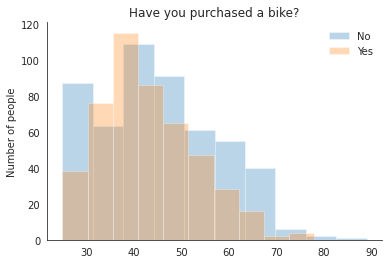

In [41]:
fig, ax = plt.subplots()

hueorder = ['Yes', 'No']

bikes_age.groupby('Purchased Bike').Age.plot(kind='hist', legend=True, alpha=0.3);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=0, frameon=False)
plt.title('Have you purchased a bike?')
plt.ylabel('Number of people');

##### 11. Correlation between car ownership, distance to work, and bicycle purchase

###### DATA PREPARATION:

Removing missing values:

In [42]:
bikes_cars_distance = bikes[['Cars', 'Commute Distance', 'Purchased Bike', 'Region']].dropna()

In the column related to bicycle purchase, we replace 'Yes' with the value 1 and 'No' with the value 0:

In [43]:
bikes_cars_distance.loc[bikes_cars_distance['Purchased Bike'] == 'Yes', 'Purchased Bike'] = '1'
bikes_cars_distance.loc[bikes_cars_distance['Purchased Bike'] == 'No', 'Purchased Bike'] = '0'

In [44]:
bikes_cars_distance['Purchased Bike'] = bikes_cars_distance['Purchased Bike'].astype('int')

Converting categorical variables to binary:

In [45]:
bikes_cars_distance = pd.get_dummies(bikes_cars_distance,
                                     columns=['Cars', 'Commute Distance', 'Region'])

Changing the order of columns:

In [46]:
bikes_cars_distance = bikes_cars_distance[['Purchased Bike',
                                           'Cars_0',
                                           'Cars_1',
                                           'Cars_2',
                                           'Cars_3',
                                           'Cars_4',
                                           'Commute Distance_0-1 Miles',
                                           'Commute Distance_1-2 Miles',
                                           'Commute Distance_2-5 Miles',
                                           'Commute Distance_5-10 Miles',
                                           'Commute Distance_10+ Miles',
                                           'Region_Europe',
                                           'Region_North America',
                                           'Region_Pacific']]

Generating a correlation matrix:

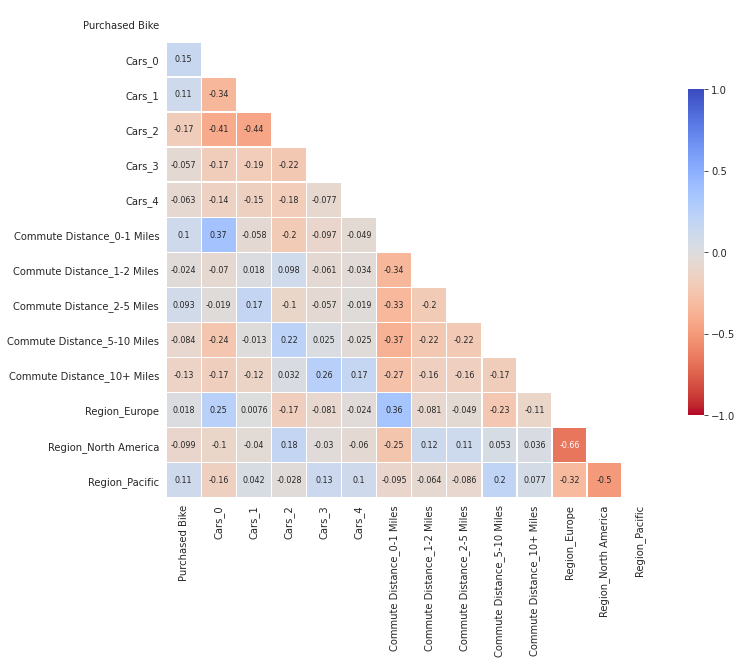

In [47]:
corr_matrix = bikes_cars_distance.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .4,
                      cmap = 'coolwarm_r',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, .5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8});

#### Conclusions

- The most likely to purchase a bicycle were people without a car who worked close to home (the correlation matrix shows a positive relationship: short distance -> no car).
- Negative correlation between owning 2 or more cars and purchasing a bicycle.
- Residents of the Pacific region are generally more likely to purchase a bicycle than Americans.